## APAI/STAT 4011 Natural Language Processing

## Assignment 1

### Submission format: 2 files (please don't zip them together), one is the ipynb file implemented with code and comments here, and one is pdf/ html file generated from this notebook. It's highly suggested that you directly write in this notebook.

*The late submission policy*: If you have difficulty handing in on time (e.g., illness etc.), you would need to send the official certificate to Dr. Lau (and cc the tutor Tracy) at least one day before the deadline via email. Otherwise, any late submission is not allowed, and your grade would be counted as 0 for this assignment.

# Part 1: Starting point of the real-life analysis (10 marks)

In this assignment, you would need to perform sentimental analysis on the corpus ***twitter_samples*** from nltk library.

### Q1-1. Load the data to your workspace and print out all the file ids inside twitter_samples. Put all the libraries or packages you would need to use in this assignment here. (2 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import twitter_samples
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer


# print out the file ids
print(twitter_samples.fileids())

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']


### Q1-2. Load the negative and positive tweets file to a dataframe with column names {tweet, sentiment} and assign label as 0 for negative, 1 for positive. Print the first 3 rows of your dataframe. (3 marks)

In [2]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

#0: negative, 1: positive

positive_tweets_dataframe = pd.DataFrame(positive_tweets, columns=['tweet'])
positive_tweets_dataframe['label'] = 1

negative_tweets_dataframe = pd.DataFrame(negative_tweets, columns=['tweet'])
negative_tweets_dataframe['label'] = 0

tweets = pd.concat([positive_tweets_dataframe, negative_tweets_dataframe])

print(tweets.head(3))

                                               tweet  label
0  #FollowFriday @France_Inte @PKuchly57 @Milipol...      1
1  @Lamb2ja Hey James! How odd :/ Please call our...      1
2  @DespiteOfficial we had a listen last night :)...      1


### Q1-3. Visualize and comment on the data balance of this dataset. (5 marks)

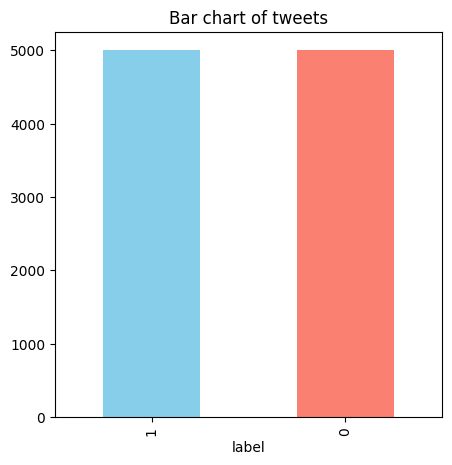

In [3]:
# visualization
fig = plt.figure(figsize=(5, 5))
colors = ["skyblue", "salmon"]
tweets.label.value_counts().plot(kind='bar', color=colors)
plt.title('Bar chart of tweets')
plt.show()

Your comment here:



# Part 2: Text Preprocessing (25 marks)

### Q2-1: The original tweets might be noisy, containing lots of elements that cause mess. Please think of what preprocessing procedure is needed for this specific dataset, and more important, what is the correct order between these steps. The below functions are the ones I think quite important for the data. Please fill in the function defintion, design more functions (if you want) and apply them in the order you decide. The text after processed should be save in a new column named **tidy_tweet**. Please clearly explain the reason you want to add this function, and why you would like to arrange the order like this. For each function, you need to print out the difference before and after the approach by showing the columns {tweet, tidy_tweet} side by side. (14 marks)

Hint: you may need to find some specific tweets to show the difference. If you want to show that your remove_url function is working properly, you may need to find some original tweets containing urls. You may consider controlling this by the random_state parameter or other methods.

In [4]:
Emoticon_Dictionary = {
    u":)":"smiley",
    u":‑\)":"smiley",
    u":\)":"smiley",
    u":-\]":"smiley",
    u":\]":"smiley",
    u":-3":"smiley",
    u":3":"smiley",
    u":->":"smiley",
    u":>":"smiley",
    u"8-\)":"smiley",
    u":o\)":"smiley",
    u":-\}":"smiley",
    u":\}":"smiley",
    u":-\)":"smiley",
    u":c\)":"smiley",
    u":\^\)":"smiley",
    u"=\]":"smiley",
    u"=\)":"smiley",
    u":‑D":"Laughing",
    u":D":"Laughing",
    u"8‑D":"Laughing",
    u"8D":"Laughing",
    u"X‑D":"Laughing",
    u"XD":"Laughing",
    u"=D":"Laughing",
    u"=3":"Laughing",
    u"B\^D":"Laughing",
    u":-\)\)":"happy",
    u":(": "sad",
    u":-(": "sad",
    u":‑\(":"sad",
    u":-\(":"sad",
    u":\(":"sad",
    u":‑c":"sad",
    u":c":"sad",
    u":‑<":"sad",
    u":<":"sad",
    u":‑\[":"sad",
    u":\[":"sad",
    u":-\|\|":"sad",
    u">:\[":"sad",
    u":\{":"sad",
    u":@":"sad",
    u">:\(":"sad",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"happiness",
    u":'\)":"happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"dismay",
    u"D;":"dismay",
    u"D=":"dismay",
    u"DX":"dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"smirk",
    u";\)":"smirk",
    u"\*-\)":"smirk",
    u"\*\)":"smirk",
    u";‑\]":"smirk",
    u";\]":"smirk",
    u";\^\)":"smirk",
    u":‑,":"smirk",
    u";D":"smirk",
    u":‑P":"playful",
    u":P":"playful",
    u"X‑P":"playful",
    u"XP":"playful",
    u":‑Þ":"playful",
    u":Þ":"playful",
    u":b":"playful",
    u"d:":"playful",
    u"=p":"playful",
    u">:P":"playful",
    u":‑/":"annoyed",
    u":/":"annoyed",
    u":-[.]":"annoyed",
    u">:[(\\\)]":"annoyed",
    u">:/":"annoyed",
    u":[(\\\)]":"annoyed",
    u"=/":"annoyed",
    u"=[(\\\)]":"annoyed",
    u":L":"annoyed",
    u"=L":"annoyed",
    u":S":"annoyed",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed",
    u":‑x":"tongue-tied",
    u":x":"tongue-tied",
    u":‑#":"tongue-tied",
    u":#":"tongue-tied",
    u":‑&":"tongue-tied",
    u":&":"tongue-tied",
    u"O:‑\)":"innocent",
    u"O:\)":"innocent",
    u"0:‑3":"innocent",
    u"0:3":"innocent",
    u"0:‑\)":"innocent",
    u"0:\)":"innocent",
    u":‑b":"cheeky",
    u"0;\^\)":"innocent",
    u">:‑\)":"Evil",
    u">:\)":"Evil",
    u"\}:‑\)":"Evil",
    u"\}:\)":"Evil",
    u"3:‑\)":"Evil",
    u"3:\)":"Evil",
    u">;\)":"Evil",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party",
    u"%‑\)":"confused",
    u"%\)":"confused",
    u":-###..":"sick",
    u":###..":"sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous",
    u"\(\^_\^;\)":"Nervous",
    u"\(-_-;\)":"Nervous",
    u"\(~_~;\) \(・\.・;\)":"Nervous",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"respect",
    u"_\(\._\.\)_":"respect",
    u"<\(_ _\)>":"respect",
    u"<m\(__\)m>":"respect",
    u"m\(__\)m":"respect",
    u"m\(_ _\)m":"respect",
    u"\('_'\)":"Sad",
    u"\(/_;\)":"Sad",
    u"\(T_T\) \(;_;\)":"Sad",
    u"\(;_;":"Sad",
    u"\(;_:\)":"Sad",
    u"\(;O;\)":"Sad",
    u"\(:_;\)":"Sad",
    u"\(ToT\)":"Sad",
    u";_;":"Sad",
    u";-;":"Sad",
    u";n;":"Sad",
    u";;":"Sad",
    u"Q\.Q":"Sad",
    u"T\.T":"Sad",
    u"QQ":"Sad",
    u"Q_Q":"Sad",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Laugh",
    u"<\^!\^>":"Laugh",
    u"\^/\^":"Laugh",
    u"\（\*\^_\^\*）" :"Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Laugh",
    u"\(^\^\)":"Laugh",
    u"\(\^\.\^\)":"Laugh",
    u"\(\^_\^\.\)":"Laugh",
    u"\(\^_\^\)":"Laugh",
    u"\(\^\^\)":"Laugh",
    u"\(\^J\^\)":"Laugh",
    u"\(\*\^\.\^\*\)":"Laugh",
    u"\(\^—\^\）":"Laugh",
    u"\(#\^\.\^#\)":"Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Cheerful",
    u"\(\^_\^\)v":"Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed"
}

<>:3: SyntaxWarning: invalid escape sequence '\)'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\]'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\)'
<>:12: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\}'
<>:14: SyntaxWarning: invalid escape sequence '\}'
<>:15: SyntaxWarning: invalid escape sequence '\)'
<>:16: SyntaxWarning: invalid escape sequence '\)'
<>:17: SyntaxWarning: invalid escape sequence '\^'
<>:18: SyntaxWarning: invalid escape sequence '\]'
<>:19: SyntaxWarning: invalid escape sequence '\)'
<>:28: SyntaxWarning: invalid escape sequence '\^'
<>:29: SyntaxWarning: invalid escape sequence '\)'
<>:32: SyntaxWarning: invalid escape sequence '\('
<>:33: SyntaxWarning: invalid escape sequence '\('
<>:34: SyntaxWarning: invalid escape sequence '\('
<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escap

In [5]:
def convert_to_lowercase(tweet):
    #change all tweets to lower case
    tweet = tweet.lower()
    return tweet

def emoji_to_word(tweet):
    #aim: remove all the emoji in the tweets
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')
    return tweet

def emoticons_to_word(tweet):
    #aim: based on the emoticon dictionary, replace all the emoticons to corresponding word
    for emoticon in Emoticon_Dictionary:
        tweet = tweet.replace(emoticon, Emoticon_Dictionary[emoticon])
    return tweet

def remove_pattern(tweet, pattern):
    #aim: remove all the "@users" appears in the tweets
    tweet = re.sub(pattern, '', tweet)
    return tweet

def remove_punctuation(tweet):
    #aim: remove all the punctuation from the tweet given
    #Punctuations are characters other than alphaters and digits.
    tweet = re.sub(r'[^\w\s]', '', tweet)
    return tweet

def remove_stopwords(tweet):
    '''
    aim: remove all stopwords in the tweets
    '''
    stopword = set(stopwords.words('english'))
    tweet = ' '.join([word for word in tweet.split() if word not in stopword])
    return tweet

def remove_urls(tweet):
    '''
    aim: remove all the urls contained inside the tweets
    '''
    tweet = re.sub(r'http\S+', '', tweet)
    return tweet


In [6]:
# following the order you specify above, print out columns {tweet, tidy_tweet} side by side

#create a new dataframe with the cleaned tweets
tweets_cleaned = pd.DataFrame(columns=['tweet', 'tidy_tweet', 'label'])

for index, row in tweets.iterrows():
    tweet = row['tweet']
    tweet = convert_to_lowercase(tweet)
    tweet = emoji_to_word(tweet)
    tweet = emoticons_to_word(tweet)
    tweet = remove_pattern(tweet, '@[\w]*')
    tweet = remove_punctuation(tweet)
    tweet = remove_stopwords(tweet)
    tweet = remove_urls(tweet)
    tweets_cleaned = pd.concat([tweets_cleaned, pd.DataFrame({'tweet': [row['tweet']], 'tidy_tweet': [tweet], 'label': [row['label']]})], ignore_index=True)

tweets_cleaned.sample(10)

<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
/var/folders/4h/wjxt22xx4ss3lv4b0yh6v4l00000gn/T/ipykernel_14877/824025041.py:11: SyntaxWarning: invalid escape sequence '\w'
  tweet = remove_pattern(tweet, '@[\w]*')


,tweet,tidy_tweet,label
9739,“@TheShoeBibles: Its mine.... http://t.co/I9rR...,mine damnnn fineeeeeeeee omaigoshhhhhhh sad,0
364,Why am I up :-)),,1
9185,@voxcinemas I want the minion bucket please :(...,want minion bucket please sad wasnt yesterday sad,0
6560,@abrwnigrl Why don't they play Blaine/Darren s...,dont play blainedarren song sad,0
1253,OMG :D #TweetOfTheDecade :Pa https://t.co/jBoi...,omg tweetofthedecade pa,1
452,@xx_dayan follow @jnlazts &amp; http://t.co/R...,follow amp follow u back smiley,1
5825,i dearly miss and love my sunshine @zaynmalik :-(,dearly miss love sunshine sad,0
2794,just boughy @AaronSegaert EX kernel manager. L...,boughy ex kernel manager love old version new ...,1
4667,"@im_soexcited @alamocitycon Btw, about that ho...",btw honeymoon smiley,1
5718,@Craig_J_Hastie @MassDeception1 uniting oppres...,uniting oppressed masses take forever sad look...,0


### Q2-2: After obtaining the clean text, we would perform stemming or lemmatization on the tweets. Fill in the defintion below and compare the difference between these two methods by creating and printing two columns {stem_tweet, lemm_tweet} side by side. State the reason why you prefer one over another. Choose the one you prefer to apply the procedure on the column {tidy_tweet}. (6 marks)

In [7]:
def stemming(tweet):
    '''
    aim: perform stemming on the text
    '''
    tweet = tweet.split()
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tweet]
    tweet = ' '.join(stemmed_words)
    return tweet

def lemmatization(tweet):
    '''
    aim: perform lemmatization on the text
    '''
    tweet = tweet.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos = 'v') for word in tweet]
    tweet = ' '.join(lemmatized_words)
    return tweet

sentence = "I am learning excitedly amusing"
print(stemming(sentence))
print(lemmatization(sentence))

tweets_with_stemming_lemmatization = pd.DataFrame(columns=['tweet', 'tidy_tweet', 'stemmed_tweet', 'lemmatized_tweet', 'label'])

for index, row in tweets_cleaned.iterrows():
    tweet = row['tidy_tweet']
    tweet1 = stemming(tweet)
    tweet2 = lemmatization(tweet)
    tweets_with_stemming_lemmatization = pd.concat([tweets_with_stemming_lemmatization, pd.DataFrame({'tweet': [row['tweet']], 'tidy_tweet': [tweet], 'stemmed_tweet': [tweet1], 'lemmatized_tweet': [tweet2], 'label': [row['label']]})], ignore_index=True)

tweets_with_stemming_lemmatization.head(5)

# Lemmatization is better than stemming

i am learn excitedli amus
I be learn excitedly amuse


,tweet,tidy_tweet,stemmed_tweet,lemmatized_tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,followfriday top engaged members community wee...,followfriday top engag member commun week smiley,followfriday top engage members community week...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,hey james odd annoyed please call contact cent...,hey jame odd annoy pleas call contact centr 02...,hey jam odd annoy please call contact centre 0...,1
2,@DespiteOfficial we had a listen last night :)...,listen last night smiley bleed amazing track s...,listen last night smiley bleed amaz track scot...,listen last night smiley bleed amaze track sco...,1
3,@97sides CONGRATS :),congrats smiley,congrat smiley,congrats smiley,1
4,yeaaaah yippppy!!! my accnt verified rqst has...,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy accnt verify rqst succeed get ...,1


### Q2-3: Tokenize the tweets and print out the final dataframe (5 marks)

In [8]:
def tokenization(tweet):
    '''
    aim: perform tokenization on the text
    '''
    tokenizer = TweetTokenizer()
    tweet = tokenizer.tokenize(tweet)
    return tweet

final_tweets = pd.DataFrame(columns=['word', 'label'])

for index, row in tweets_with_stemming_lemmatization.iterrows():
    tweet = row['lemmatized_tweet']
    tweet = tokenization(tweet)
    for word in tweet:
        final_tweets = pd.concat([final_tweets, pd.DataFrame({'word': [word], 'label': [row['label']]})], ignore_index=True)

final_tweets.head(20)

,word,label
0,followfriday,1
1,top,1
2,engage,1
3,members,1
4,community,1
5,week,1
6,smiley,1
7,hey,1
8,jam,1
9,odd,1


# Part 3: Visualization (15 marks)

### Q3-1: Build and plot the wordcloud for the whole dataset, the negative tweets, and the positive tweets, respectively. Analyze if the result is reasonable. Or if you think there are strange scenarios, what is the possible reasons behind. (5 marks)

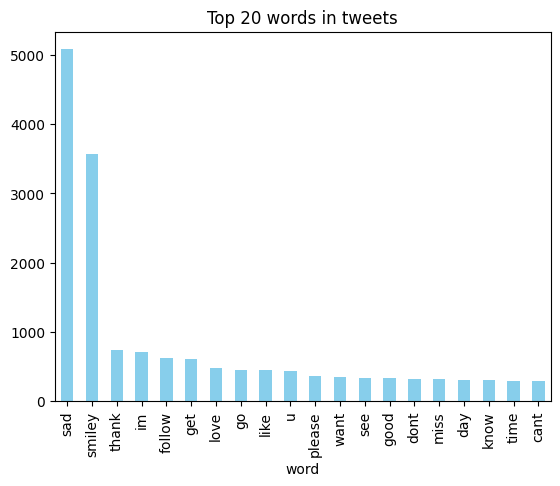

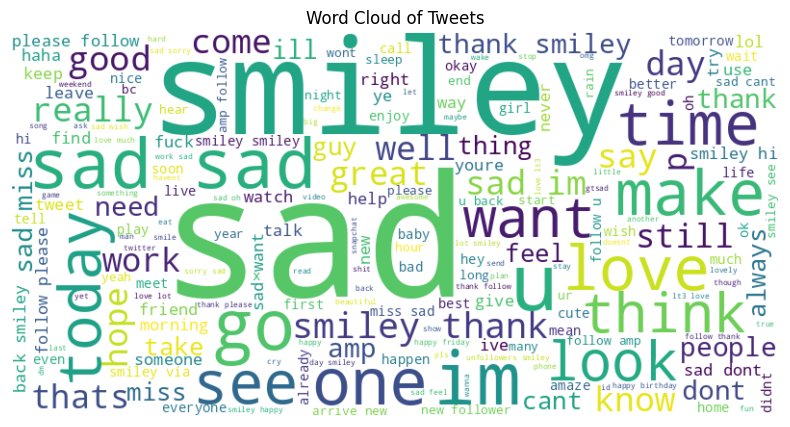

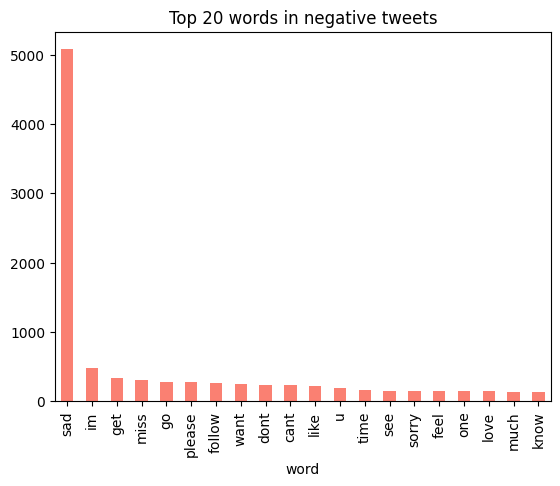

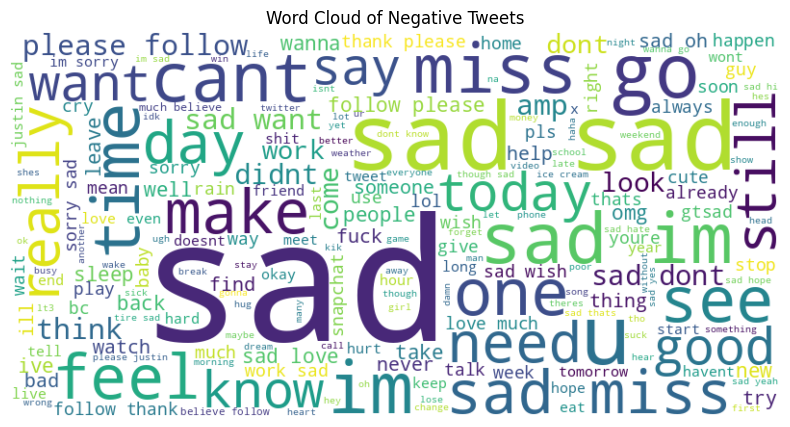

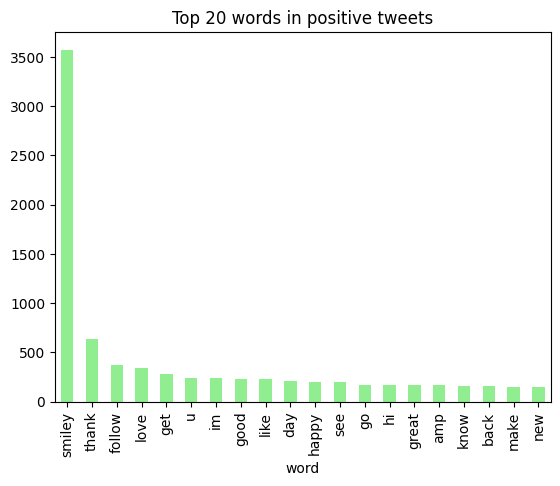

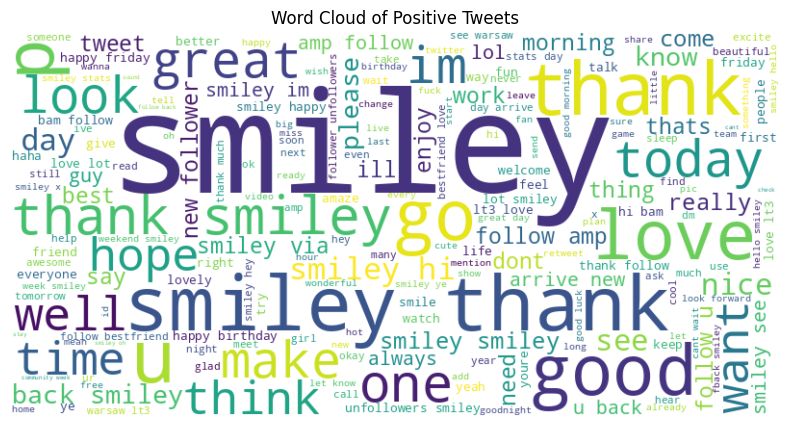

In [9]:
from wordcloud import WordCloud

# wordcloud for all
all_words_freq = final_tweets.word.value_counts()
all_words_freq = all_words_freq[:20]
all_words_freq.plot(kind='bar', color='skyblue')
plt.title('Top 20 words in tweets')
plt.show()

all_words = ' '.join(final_tweets['word'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


# wordcloud for negative
negative_words_freq = final_tweets[final_tweets['label'] == 0].word.value_counts()
negative_words_freq = negative_words_freq[:20]
negative_words_freq.plot(kind='bar', color='salmon')
plt.title('Top 20 words in negative tweets')
plt.show()

negative_words = ' '.join(final_tweets[final_tweets['label'] == 0]['word'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()

# wordcloud for positive
positive_words_freq = final_tweets[final_tweets['label'] == 1].word.value_counts()
positive_words_freq = positive_words_freq[:20]
positive_words_freq.plot(kind='bar', color='lightgreen')
plt.title('Top 20 words in positive tweets')

positive_words = ' '.join(final_tweets[final_tweets['label'] == 1]['word'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

### Q3-2: Hashtag might contains important information regarding the sentiment. Build two barplots for the hashtag in negative tweets and positive tweets respectively. What do you find? Do you think hashtag is helpful for our sentimental analysis? (10 marks)

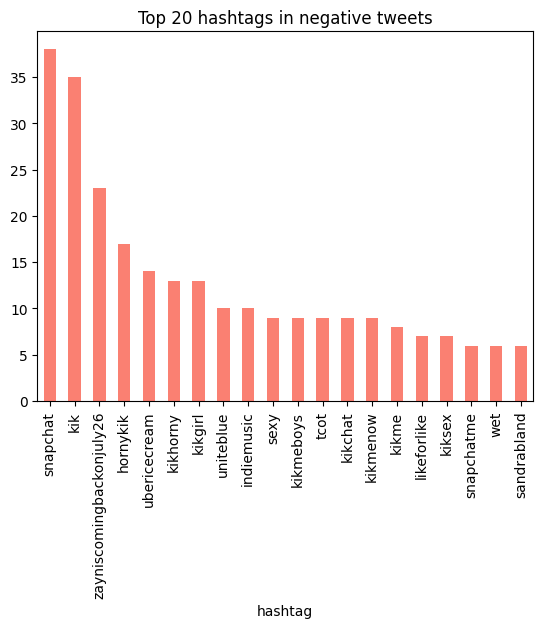

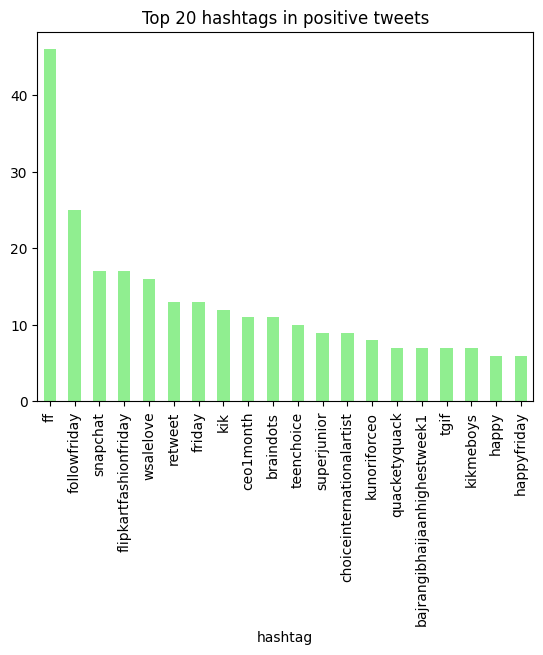

In [10]:
hashtags_frame = pd.DataFrame(columns=['hashtag', 'label'])

for index, row in tweets_with_stemming_lemmatization.iterrows():
    tweet = row['tweet']
    tweet = convert_to_lowercase(tweet)
    #detect #hashtags
    hashtags = re.findall(r"#(\w+)", tweet)
    for hashtag in hashtags:
        hashtags_frame = pd.concat([hashtags_frame, pd.DataFrame({'hashtag': [hashtag], 'label': [row['label']]})], ignore_index=True)

# bar plot for negative
negative_hashtags_freq = hashtags_frame[hashtags_frame['label'] == 0].hashtag.value_counts()
negative_hashtags_freq = negative_hashtags_freq[:20]
negative_hashtags_freq.plot(kind='bar', color='salmon')
plt.title('Top 20 hashtags in negative tweets')
plt.show()


# bar plot for positive
positive_hashtags_freq = hashtags_frame[hashtags_frame['label'] == 1].hashtag.value_counts()
positive_hashtags_freq = positive_hashtags_freq[:20]
positive_hashtags_freq.plot(kind='bar', color='lightgreen')
plt.title('Top 20 hashtags in positive tweets')
plt.show()


# Part 4: Modelling (50 marks)

### Q4-1: Divide the dataset into 80% training set and 20% testing set. Perform three types of feature extraction techniques we have covered so far to the dataset for preparation. Clearly state what is the difference between these techniques and which one you expect would be the most appropriate. (5 marks)

In [11]:
# divide the datatset into training and testing set (80% training, 20% testing)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = tweets_with_stemming_lemmatization['lemmatized_tweet']
y = tweets_with_stemming_lemmatization['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# feature extraction 1
# CountVectorizer: Convert a collection of text documents to a matrix of token counts
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print(X_train_count.shape)
print(X_test_count.shape)


# feature extraction 2
# TfidfVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# feature extraction 3
# TfidfVectorizer with ngram_range: Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf_ngram = tfidf_vectorizer_ngram.fit_transform(X_train)
X_test_tfidf_ngram = tfidf_vectorizer_ngram.transform(X_test)



(8000, 9690)
(2000, 9690)


### Q4-2: Use the sklearn package to implement KNN classifier models with difference number of neighbors. Please use three types of features above, and use the following metrics for comparing the performance: {accuracy, f1, precision, recall}. Write out how the metrics are calculated with formulas (or other ways). Plot the results using line chart, and suggest the best choice for this parameter. (10 marks)

Best neighbor by using CountVectorizer: 21


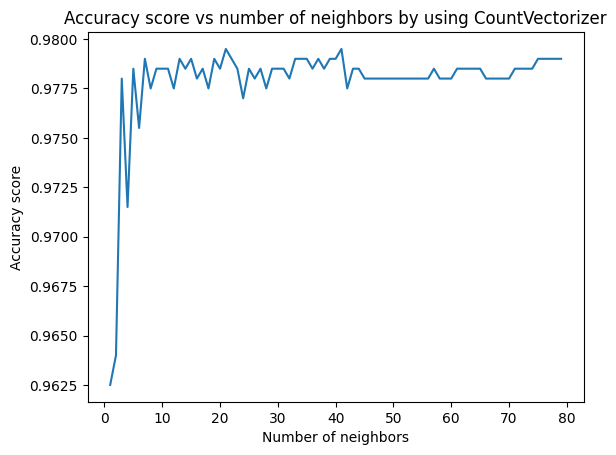

Best neighbor by using TfidfVectorizer: 78


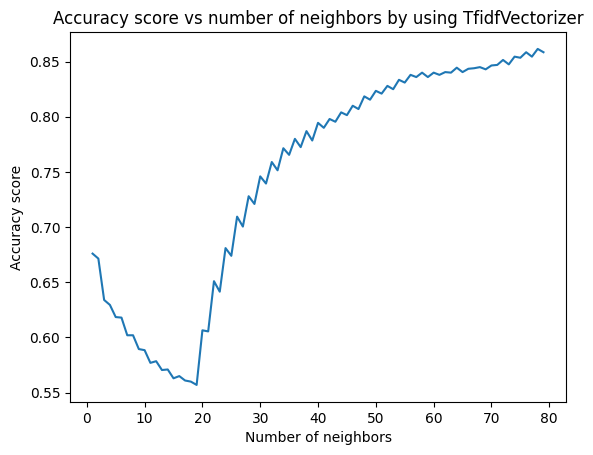

Best neighbor by using TfidfVectorizer with ngram_range: 79


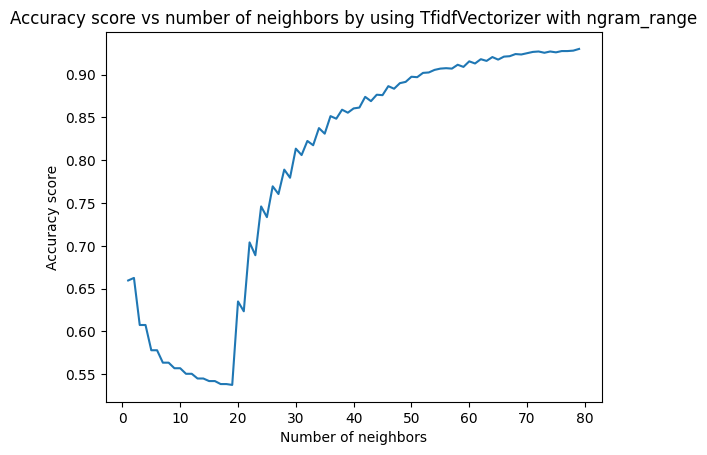

In [12]:
# KNN classifiers with different neighbors (1,2,3,4,... etc)
from sklearn.neighbors import KNeighborsClassifier
# Ensure y_train contains discrete class labels
y_train = y_train.astype('int')
y_test = y_test.astype('int')


# plot a line chart
#neighbors is a list of integers from 1 to 80
neighbors = range(1, 80)

accuracy_scores = []
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_count, y_train)
    y_pred = knn.predict(X_test_count)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_neighbor_count = neighbors[accuracy_scores.index(max(accuracy_scores))]
print('Best neighbor by using CountVectorizer:', best_neighbor_count)

plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs number of neighbors by using CountVectorizer')
plt.show()

# plot a line chart
accuracy_scores = []
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_tfidf, y_train)
    y_pred = knn.predict(X_test_tfidf)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_neighbor_tf_idf = neighbors[accuracy_scores.index(max(accuracy_scores))]
print('Best neighbor by using TfidfVectorizer:', best_neighbor_tf_idf)

plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs number of neighbors by using TfidfVectorizer')
plt.show()

# plot a line chart
accuracy_scores = []
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_tfidf_ngram, y_train)
    y_pred = knn.predict(X_test_tfidf_ngram)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_neighbor_tf_idf_ngram = neighbors[accuracy_scores.index(max(accuracy_scores))]
print('Best neighbor by using TfidfVectorizer with ngram_range:', best_neighbor_tf_idf_ngram)

plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs number of neighbors by using TfidfVectorizer with ngram_range')
plt.show()


### Q4-3: Use the sklearn package to implement Naive Bayes classifier, Logistic regression, and KNN classifier. For KNN, you may directly use the best result above. Again use three types of features above, and use the following metrics for comparing the performance: {accuracy, f1, precision, recall}. Summarize the scores into tables and provide possible reasons that lead to this situation. Is the performance good? Why? (5 marks)

Hint: you should have $3*3*4=36$ outputs. When performing comparison, you could analyze from two views, one is comparing different feature extraction methods while model is the same, another is comparing different models when applying the same feature extraction procedure.

In [13]:
# naive bayes classifier with CountVectorizer
print('Naive Bayes classifier with CountVectorizer')
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_count, y_train)
y_pred = naive_bayes.predict(X_test_count)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# naive bayes classifier with TfidfVectorizer
print('Naive Bayes classifier with TfidfVectorizer')
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred = naive_bayes.predict(X_test_tfidf)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# naive bayes classifier with TfidfVectorizer with ngram_range
print('Naive Bayes classifier with TfidfVectorizer with ngram_range')
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf_ngram, y_train)
y_pred = naive_bayes.predict(X_test_tfidf_ngram)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))



# logistic regression with CountVectorizer
print('Logistic regression with CountVectorizer')
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_count, y_train)
y_pred = logistic_regression.predict(X_test_count)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# logistic regression with TfidfVectorizer
print('Logistic regression with TfidfVectorizer')
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)
y_pred = logistic_regression.predict(X_test_tfidf)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# logistic regression with TfidfVectorizer with ngram_range
print('Logistic regression with TfidfVectorizer with ngram_range')
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf_ngram, y_train)
y_pred = logistic_regression.predict(X_test_tfidf_ngram)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))


# KNN classifier with CountVectorizer
print('KNN classifier with CountVectorizer')
knn = KNeighborsClassifier(n_neighbors=best_neighbor_count)
knn.fit(X_train_count, y_train)
y_pred = knn.predict(X_test_count)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# KNN classifier with TfidfVectorizer
print('KNN classifier with TfidfVectorizer')
knn = KNeighborsClassifier(n_neighbors=best_neighbor_tf_idf)
knn.fit(X_train_tfidf, y_train)
y_pred = knn.predict(X_test_tfidf)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

# KNN classifier with TfidfVectorizer with ngram_range
print('KNN classifier with TfidfVectorizer with ngram_range')
knn = KNeighborsClassifier(n_neighbors=best_neighbor_tf_idf_ngram)
knn.fit(X_train_tfidf_ngram, y_train)
y_pred = knn.predict(X_test_tfidf_ngram)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
#print('Confusion matrix: ', confusion_matrix(y_test, y_pred))


Naive Bayes classifier with CountVectorizer
Accuracy score:  0.947
Classification report:                precision    recall  f1-score   support

           0       0.91      0.99      0.95      1004
           1       0.99      0.90      0.94       996

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Naive Bayes classifier with TfidfVectorizer
Accuracy score:  0.9095
Classification report:                precision    recall  f1-score   support

           0       0.88      0.95      0.91      1004
           1       0.95      0.87      0.90       996

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Naive Bayes classifier with TfidfVectorizer with ngram_range
Accuracy score:  0.9245
Classification report:                precision    recall  f1-score   support


### Q4-4: Write out the procedure how naive bayes classifier is classifying our dataset. Remember to clearly write out the mathematical formulas involved in the procedure. Implement the naive bayes classifier step by step (without directly calling any package). Add clear explanations to your python code based on the procedure you stated above. Compare the results you get here with the one in Q4-3. (15 marks)

Naive Bayes procedure:

**Calculate Prior Probabilities**:
   - For each class $C_k$, calculate the prior probability $P(C_k)$:
     $$ P(C_k) = \frac{N_k}{N} $$
     where $N_k$ is the number of instances in class $C_k$ and $N$ is the total number of instances.

**Calculate Likelihood**:
   - For each feature $x_i$ given class $C_k$, calculate the likelihood $P(x_i|C_k)$:
     $$ P(x_i|C_k) = \frac{N_{ik} + \alpha}{N_k + \alpha \cdot n} $$
     where $N_{ik}$ is the number of instances in class $C_k$ with feature $x_i$, $\alpha$ is the smoothing parameter, and $n$ is the number of possible values of $x_i$.

**Calculate Posterior Probability**:
   - For a given instance with features $x_1, x_2, ..., x_n$, calculate the posterior probability for each class $C_k$:
     $$ P(C_k|x_1, x_2, ..., x_n) \propto P(C_k) \cdot \prod_{i=1}^{n} P(x_i|C_k) $$

**Class Prediction**:
   - Predict the class with the highest posterior probability:
     $$ \hat{C} = \arg\max_{C_k} P(C_k|x_1, x_2, ..., x_n) $$

In [14]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

def calculate_prior(y):
    classes = np.unique(y)
    prior = {c: np.mean(y == c) for c in classes}
    return prior

def calculate_likelihood(X, y):
    n_features = X.shape[1]
    classes = np.unique(y)
    likelihood = {c: (X[y == c].sum(axis=0) + 1) / (y[y == c].shape[0] + n_features) for c in classes}
    return likelihood

def train_naive_bayes(X, y):
    prior = calculate_prior(y)
    likelihood = calculate_likelihood(X, y)
    return prior, likelihood

def predict_naive_bayes(X, prior, likelihood):
    n_samples, n_features = X.shape
    classes = list(prior.keys())
    y_pred = []
    for i in range(n_samples):
        class_prob = {}
        for c in classes:
            class_prob[c] = np.log(prior[c]) + np.sum(np.log(likelihood[c]) * X[i])
        y_pred.append(max(class_prob, key=class_prob.get))
    return y_pred

# Train the model
prior, likelihood = train_naive_bayes(X_train_count.toarray(), y_train)

# Make predictions
y_pred_train = predict_naive_bayes(X_train_count.toarray(), prior, likelihood)
y_pred_test = predict_naive_bayes(X_test_count.toarray(), prior, likelihood)

# Evaluate the model
print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')


Training Accuracy: 0.977875
Test Accuracy: 0.944


### Q4-5: Write out the procedure how logistic regression is working in our case. Remember to clearly write out the mathematical formulas involved in the procedure. Implement the logistic regression using Stochastic Gradient Descent (SGD) step by step (without directly calling any package). Add clear explanations to your python code based on the procedure you stated above. Compare the results you get here with the one in Q4-3.

Logistic regression procedure:
1. Logistic Function
The logistic function (also called the sigmoid function) is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = X \cdot \beta$.

2. Probability Prediction
The output of the logistic function is the probability that a given input ( X ) belongs to the positive class:

$$
P(y=1 | X) = \sigma(X \cdot \beta)
$$

3. Cost Function
The cost function for logistic regression is the Log-Loss (cross-entropy loss):

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\sigma(X_i \cdot \beta)) + (1 - y_i) \log(1 - \sigma(X_i \cdot \beta)) \right]
$$

where $m$  is the number of training examples.

4. Gradient Descent
The weights ( \beta ) are updated to minimize the cost function using gradient descent:

$$
\beta := \beta - \alpha \frac{\partial J(\beta)}{\partial \beta}
$$

where $\alpha$ is the learning rate.

5. Classification
After training, new inputs ( X ) are classified by computing the probability and applying a threshold (e.g., 0.5):

$$
\text{Class} =
\begin{cases}
1 & \text{if } P(y=1 | X) \geq 0.5 \
0 & \text{if } P(y=1 | X) < 0.5
\end{cases}
$$

In [15]:
#X_train, X_test, y_train, y_test
'''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train.head(5))
print(y_train.head(5))
'''
# tokenize the data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dw = 1/m * np.dot(X.T, (y_pred - y))
    db = 1/m * np.sum(y_pred - y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train(X, y, learning_rate, epochs):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights, bias

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Assuming X_train_count and X_test_count are the count vectorized data
learning_rate = 0.01
epochs = 200 # number of iterations

weights, bias = train(X_train_count.toarray(), y_train, learning_rate, epochs)
y_pred_train = predict(X_train_count.toarray(), weights, bias)
y_pred_test = predict(X_test_count.toarray(), weights, bias)

print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')



Epoch 0, Loss: 0.6931471805599454
Epoch 100, Loss: 0.6059404194065462
Training Accuracy: 0.981375
Test Accuracy: 0.98
